In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.utils.np_utils import to_categorical

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd /content/gdrive/My\ Drive/Final\ Project

/content/gdrive/My Drive/Final Project


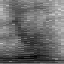

In [0]:
# img = image.load_img("free-spoken-digit-dataset-master/spectrograms/0_jackson_0.png")
# img

In [0]:
# img_arr = image.img_to_array(img)
# print(img_arr.shape)
# img_arr

(64, 64, 3)


In [0]:
# img_arr = np.expand_dims(img_arr, axis=0)
# print(img_arr.shape)

(1, 64, 64, 3)


In [0]:
# Load all images files, convert to numpy array with related labels in a list format
imagesDir = "free-spoken-digit-dataset-master/spectrograms/"
trainset = []
testset = []
for file in os.listdir(imagesDir):
    label = file.split('_')[0]
    sample_number = file.split('_')[2]
    img = image.load_img(imagesDir+file)
    if sample_number in ['0.png','1.png','2.png','3.png','4.png']:
        testset.append([image.img_to_array(img), label])
    else:
        trainset.append([image.img_to_array(img), label])    

In [0]:
# img2 = image.array_to_img(trainset[6][0])
# img2

In [0]:
# Get only images in the train list not the Labels
X_train = [item[0] for item in trainset]

# Get only Labels in the train list not the images
y_train = [item[1] for item in trainset]

# Get only images in the test list not the Labels
X_test = [item[0] for item in testset]

# Get only Labels in the test list not the images
y_test = [item[1] for item in testset]

In [0]:
X_test

In [0]:
# Convert list to numpy array in order to define input shape
X_train = np.asanyarray(X_train)
y_train = np.asanyarray(y_train)
X_test = np.asanyarray(X_test)
y_test = np.asanyarray(y_test)

In [0]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1800, 64, 64, 3) (200, 64, 64, 3) (1800,) (200,)


In [0]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [0]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1800, 64, 64, 3) (200, 64, 64, 3) (1800, 10) (200, 10)


In [0]:
# Save data to file to load without creating datasets again

np.save('xtrain_file', X_train)
np.save('xtest_file', X_test)
np.save('ytrain_file', y_train)
np.save('ytest_file', y_test)